In [1]:
# Import the Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pywaffle import Waffle
import plotly.express as px
import joblib
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import ensemble
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve,RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from matplotlib import pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 1. Business Problem

In today's world, time and speed have become important factors, which increases the importance of air transportation day by day. Consequently, competition in the airline industry is increasing. This competition plays a critical role in the success of airlines because it is important to ensure customer satisfaction. However, the factors that influence passenger satisfaction are quite complex and can be difficult to understand. In this project, we aim to predict the factors affecting customer satisfaction using data analytics and machine learning.

### 2. Dataset Story

In this project, a dataset containing the results of a survey on Airline Passenger Satisfaction is used. The dataset is divided into two parts: training and testing. The entire dataset (test and training total) consists of 129,880 records and 25 columns. Analysis and modeling were performed on the training data. The training dataset consists of 103,904 observations and 25 variables. The variables "Id" and "Unnamed" are omitted because they do not make sense.

Our target variable in the dataset is "satisfaction" and consists of two classes:

* Satisfaction  
* Undecided or dissatisfied

### 3. Features

- Gender                           : Passenger Sex (Male or female).
- Customer Type                    : Passenger type (Loyal or Disloyal).
- Age                              : The actual age of the passenger.
- Type of Travel                   : The purpose of the passenger's flight (Personal or Business)
- Class                            : Ticket Type (Business, economy, economy plus).
- Flight Distance                  : Distance of Flight.
- Inflight Wi-Fi Service           : Satisfaction level with Wi-Fi service on board (0: not rated; 1-5).
- Departure/Arrival time convenient: Departure/arrival time convenient level (0: not rated; 1-5).
- Ease of Online booking           : Easy online booking rate (0: not rated; 1-5).
- Gate location                    : Level of availible with the gate location (0: not rated; 1-5).
- Food and drink                   : Food and drink flavor level (0: not rated; 1-5).
- Online boarding                  : User friendly online boarding (0: not rated; 1-5).
- Seat comfort                     : Seat comfort level (0: not rated; 1-5).
- Inflight entertainment           : Quality of Inflight entertainment system (0: not rated; 1-5).
- On-board service                 : Flight satisfaction with on-board service (0: not rated; 1-5).
- Legroom service                  : Legroom suitability (0: not rated; 1-5).
- Baggage handling                 : Baggage handling (0: not rated; 1-5).
- Checkin service                  : User friendly checkin service (0: not rated; 1-5).
- Inflight service                 : Level of satisfaction with inflight service (0: not rated; 1-5).
- Cleanliness                      : Airplane cleanliness (0: not rated; 1-5).
- Departure delay in minutes       : Departure delay.
- Arrival delay in minutes         : Arrival delay.

In [3]:
# Read the train and test CSV files
df1 = pd.read_csv("data/train.csv")
df2 = pd.read_csv("data/test.csv")

In [4]:
df1.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                    18.000  neutral or dissatisfied  
1                     6.000  neutral or dissatisfied  
2                     0.000                satisfied  
3                     9.000  neutral or dissatisfied  
4                     0.000                satisfied

In [5]:
# id and Unnamed dropped, because they have no information.

df1 = df1.drop(df1.iloc[:, [0, 1]], axis=1)

### 4. Exploratory Data Analysis (EDA) 

In [6]:
def check_df(dataframe, head=5):
    print("######## Shape ########")
    print(dataframe.shape)
    print("######## Types ########")
    print(dataframe.dtypes)
    print("######## Head ########")
    print(dataframe.head())
    print("######## Tail ########")
    print((dataframe.tail()))
    print("######## Nunique Values ########")
    print(dataframe.nunique())
    print("######## Zero Values ########")
    print((dataframe == 0).sum())
    print("######## NA ########")
    print(dataframe.isnull().sum())
    print("######## Quantiles ########")
    print(dataframe.describe([0, 0.05, 0.50,0.60,0.70,0.80,0.90, 0.95, 0.99, 1]).T)

In [7]:
check_df(df1)

######## Shape ########
(103904, 23)
######## Types ########
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             

                                       count     mean     std    min     0%  \
Age                               103904.000   39.380  15.115  7.000  7.000   
Flight Distance                   103904.000 1189.448 997.147 31.000 31.000   
Inflight wifi service             103904.000    2.730   1.328  0.000  0.000   
Departure/Arrival time convenient 103904.000    3.060   1.525  0.000  0.000   
Ease of Online booking            103904.000    2.757   1.399  0.000  0.000   
Gate location                     103904.000    2.977   1.278  0.000  0.000   
Food and drink                    103904.000    3.202   1.330  0.000  0.000   
Online boarding                   103904.000    3.250   1.350  0.000  0.000   
Seat comfort                      103904.000    3.439   1.319  0.000  0.000   
Inflight entertainment            103904.000    3.358   1.333  0.000  0.000   
On-board service                  103904.000    3.382   1.288  0.000  0.000   
Leg room service                  103904.000    3.35

In [12]:
# Capture numerical and categorical variables.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

     It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
     Note: Categorical variables with numerical appearance are also included.

    Parameters
    ------
        dataframe: dataframe
                Dataframe from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for variables that are numeric but categorical
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numerical variable list
        cat_but_car: list
                List of cardinal variables with categorical view

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        inside num_but_cat cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [13]:
cat_cols, num_cols, cat_but_car = grab_col_names(df1)

Observations: 103904
Variables: 23
cat_cols: 19
num_cols: 4
cat_but_car: 0
num_but_cat: 14


([<matplotlib.patches.Wedge at 0x279474e71d0>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'Neutral or dissatisfied'),
  Text(0.228705062722272, -1.0759618925804026, 'Satisfied')],
 [Text(-0.12474821603032998, 0.5868883050438559, '56.7%'),
  Text(0.12474821603033018, -0.5868883050438559, '43.3%')])

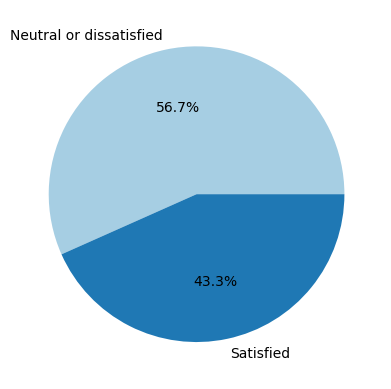

In [10]:
# Target Visualization

plt.pie(df1.satisfaction.value_counts(), labels=["Neutral or dissatisfied", "Satisfied"],
        colors=sns.color_palette("Paired"), autopct='%1.1f%%')

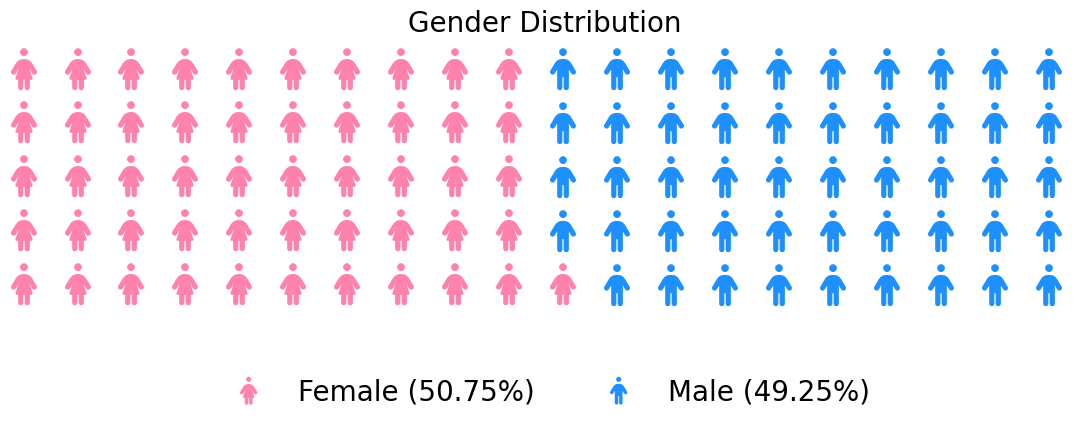

In [11]:
# Calculate the counts of each gender
gender_counts = df1['Gender'].value_counts()

# Calculate the percentage of each gender category
gender_percentage = (gender_counts / len(df1)) * 100

# Create a figure for the Waffle chart
fig = plt.figure( 
    FigureClass=Waffle,
    rows=5,  # rows of people
    figsize=(11, 6),
    values=gender_percentage,  # data as percentages
    labels=[f"Female ({gender_percentage['Female']:.2f}%)", f"Male ({gender_percentage['Male']:.2f}%)"],  # legend labels with percentages
    colors=["#FF82AB", "#1E90FE"],  # Custom colors (baby pink and baby blue)
    icons=['female', 'male'],  # Use 'female' and 'male' symbols available in pywaffle
    legend={'loc': 'lower center',
            'bbox_to_anchor': (0.5, -0.5),
            'ncol': len(gender_counts),
            'framealpha': 0,
            'fontsize': 20
            },
    icon_size=30,  # Size of icons (people)
    icon_legend=True,
    title={'label': 'Gender Distribution',
           'loc': 'center',
           'fontdict': {'fontsize': 20}
           }
)

plt.show()

In [12]:
# Define age group bins and labels
age_bins = [0, 25, 40, 65, 95]
age_labels = ["0-24", "25-39", "40-64", "65-95"]

# Create a new column 'Age Group' based on age bins and labels
df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

In [13]:
# Group the data by age group and count the number of customers in each group
age_group_counts = df1['Age Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

In [14]:
# Create a bar plot for age group analysis
fig = px.bar(
    age_group_counts,
    x='Age Group',
    y='Count',
    title='Age Group Analysis',
    labels={'Count': 'Number of Customers'},
    color='Age Group',
    color_discrete_sequence=px.colors.sequential.Blues[::-1],  # Customize the color
)
# Add number of customers on top of each bar
fig.update_traces(
    text=age_group_counts['Count'],  # Text to display on each bar
    textposition='outside',  # Position the text outside the bar
    marker=dict(line=dict(color='#000000', width=1)),  # Add black borders to bars
)


# Customize layout and style
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of Customers',
    font=dict(size=12),
    title_font=dict(size=16),
    showlegend=False,
    #paper_bgcolor='#F2F2F2',  # Background color
    plot_bgcolor='#FFFFFF',  # Plot background color
    margin=dict(l=40, r=40, t=80, b=40),  # Margins
)

# Show the bar plot
fig.show()

In [15]:
# Create a histogram of flight distance
fig = px.histogram(
    df1,
    x="Flight Distance",
    title="Distribution of Flight Distance",
    labels={"Flight Distance": "Distance (Miles)", "count": "Number of Customers"},
    color_discrete_sequence=["#08306B"],  # Custom color #87CEEB
)

# Customize the layout and appearance
fig.update_xaxes(title_font=dict(size=14), tickfont=dict(size=12))
# fig.update_yaxes(title_text="Number of Customers", title_font=dict(size=14), tickfont=dict(size=12))
fig.update_layout(
    title_font=dict(size=18),
    paper_bgcolor="rgba(255, 255, 255, 0.8)",  # Light background
    plot_bgcolor="rgba(255, 255, 255, 0.8)",   # Light plot area background
    font=dict(size=12, color="#333333"),  # Text color
    xaxis=dict(gridcolor="rgba(200, 200, 200, 0.2)"),  # Gridlines
    yaxis=dict(gridcolor="rgba(200, 200, 200, 0.2)"),  # Gridlines
)

# Show the plot
fig.show()

In [16]:
# Define bins and labels for flight distance groups
flight_distance_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000]
flight_distance_labels = ["0-500", "501-1000", "1001-1500", "1501-2000", "2001-2500", "2501-3000", "3001-3500", "3501-4000", "4001-5000"]

# Create a new column 'Flight Distance Group' based on flight distance bins and labels
df1['Flight Distance Group'] = pd.cut(df1['Flight Distance'], bins=flight_distance_bins, labels=flight_distance_labels, right=False)

In [17]:
# Group the data by flight distance group and count the number of customers in each group
flight_distance_group_counts = df1['Flight Distance Group'].value_counts().reset_index()
flight_distance_group_counts.columns = ['Flight Distance Group', 'Count']

In [18]:
# Create a bar plot for flight distance group analysis
fig = px.bar(
    flight_distance_group_counts,
    x='Flight Distance Group',
    y='Count',
    title='Flight Distance Group Analysis',
    #color_discrete_sequence=["#66B2FF"],  # Customize the color
    color='Flight Distance Group',
    color_discrete_sequence=px.colors.sequential.Blues[::-1] # Customize the color
)

# Add number of customers on top of each bar
fig.update_traces(
    text=flight_distance_group_counts['Count'],  # Text to display on each bar
    textposition='outside',  # Position the text outside the bar
    marker=dict(line=dict(color='#000000', width=1)),  # Add black borders to bars
)

# Customize layout and style
fig.update_layout(
    xaxis_title='Flight Distance Group',
    font=dict(size=12),
    title_font=dict(size=16),
    showlegend=False,
    #paper_bgcolor='#F2F2F2',  # Background color
    plot_bgcolor='#FFFFFF',  # Plot background color
    margin=dict(l=40, r=40, t=80, b=40),  # Margins
)

# Show the bar plot
fig.show()

In [19]:

# Analyze for Categorical Values

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
          "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, palette='winter')
        plt.show(block=True)

In [20]:
def categorical_pie_chart(data, columns):
    """
    Creates a pie chart for specified categorical variables in the given data frame.
    
    Args:
        data (DataFrame): The data frame to use.
        columns (list): List of categorical variables to create a pie chart for.
    """
    cat_cols = len(columns)
    fig, axs = plt.subplots(1, cat_cols, figsize=(5*cat_cols, 5))
    
    for i, col in enumerate(columns):
        counts = data[col].value_counts()
        colors = sns.color_palette("Paired")
        axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
        axs[i].set_title(col)
    
    plt.show()

In [21]:
# Create a pie chart using the function
categorical_pie_chart(df1, ["Gender", "Customer Type", "Type of Travel", "Class"])

In [22]:
# Bar graph representation of variables with more than 3 classes
cat_bar_chart = [col for col in cat_cols if df1[col].nunique() >3]

                       Inflight wifi service  Ratio
Inflight wifi service                              
3                                      25868 24.896
2                                      25830 24.859
4                                      19794 19.050
1                                      17840 17.170
5                                      11469 11.038
0                                       3103  2.986
################


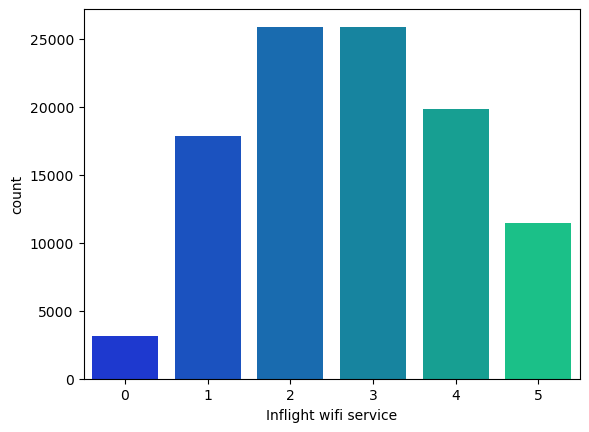

                                   Departure/Arrival time convenient  Ratio
Departure/Arrival time convenient                                          
4                                                              25546 24.586
5                                                              22403 21.561
3                                                              17966 17.291
2                                                              17191 16.545
1                                                              15498 14.916
0                                                               5300  5.101
################


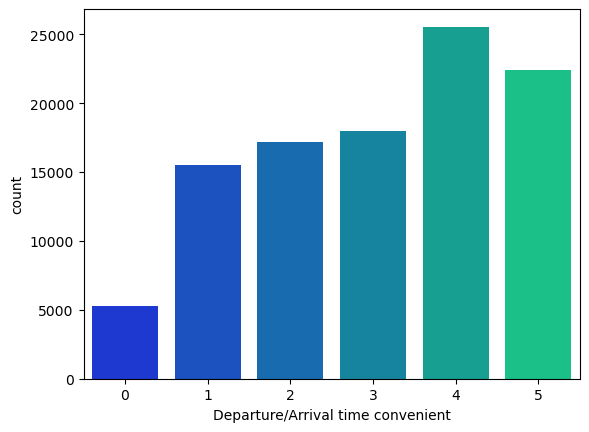

                        Ease of Online booking  Ratio
Ease of Online booking                               
3                                        24449 23.530
2                                        24021 23.118
4                                        19571 18.836
1                                        17525 16.867
5                                        13851 13.331
0                                         4487  4.318
################


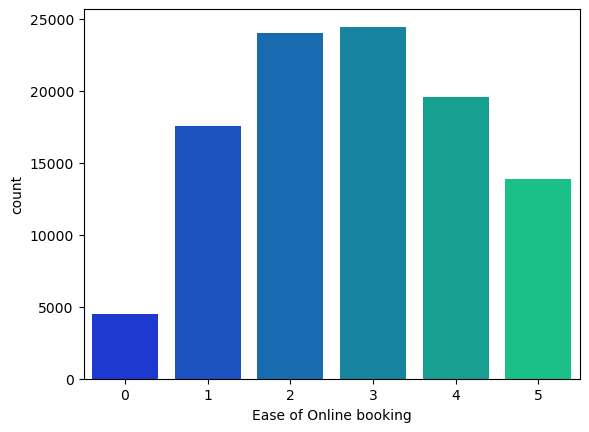

               Gate location  Ratio
Gate location                      
3                      28577 27.503
4                      24426 23.508
2                      19459 18.728
1                      17562 16.902
5                      13879 13.358
0                          1  0.001
################


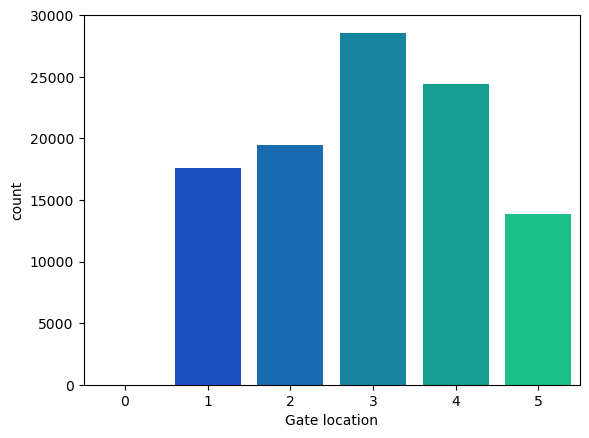

                Food and drink  Ratio
Food and drink                       
4                        24359 23.444
5                        22313 21.475
3                        22300 21.462
2                        21988 21.162
1                        12837 12.355
0                          107  0.103
################


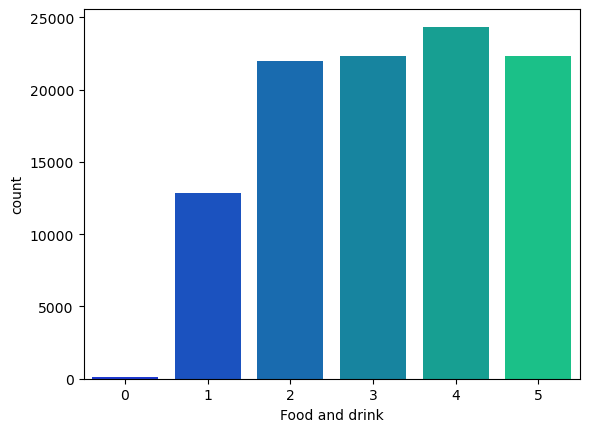

                 Online boarding  Ratio
Online boarding                        
4                          30762 29.606
3                          21804 20.985
5                          20713 19.935
2                          17505 16.847
1                          10692 10.290
0                           2428  2.337
################


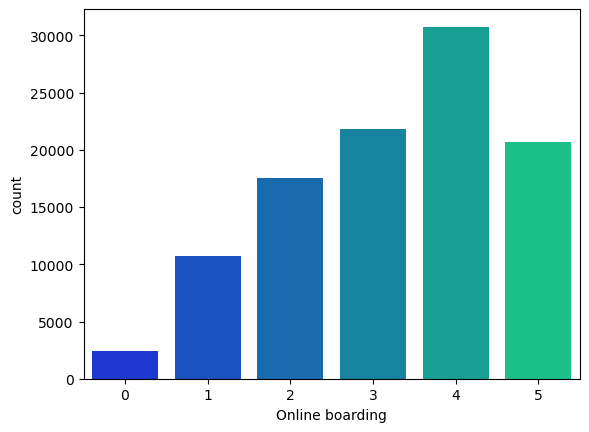

              Seat comfort  Ratio
Seat comfort                     
4                    31765 30.571
5                    26470 25.475
3                    18696 17.994
2                    14897 14.337
1                    12075 11.621
0                        1  0.001
################


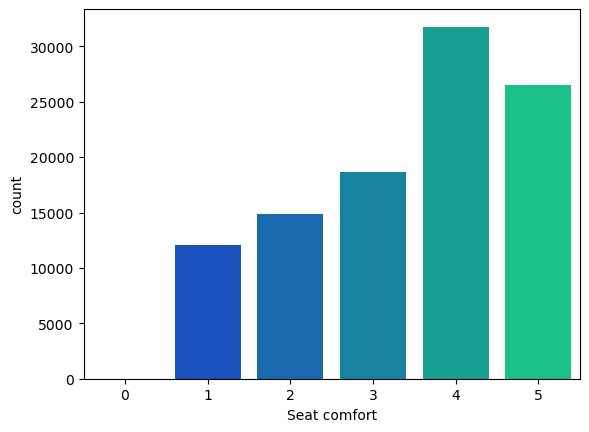

                        Inflight entertainment  Ratio
Inflight entertainment                               
4                                        29423 28.317
5                                        25213 24.266
3                                        19139 18.420
2                                        17637 16.974
1                                        12478 12.009
0                                           14  0.013
################


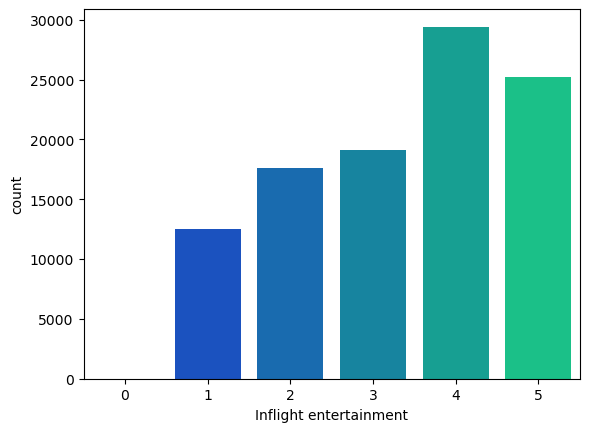

                  On-board service  Ratio
On-board service                         
4                            30867 29.707
5                            23648 22.759
3                            22833 21.975
2                            14681 14.129
1                            11872 11.426
0                                3  0.003
################


                  Leg room service  Ratio
Leg room service                         
4                            28789 27.707
5                            24667 23.740
3                            20098 19.343
2                            19525 18.791
1                            10353  9.964
0                              472  0.454
################


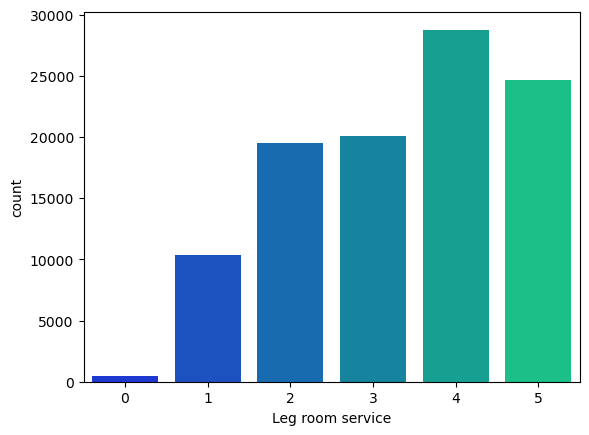

                  Baggage handling  Ratio
Baggage handling                         
4                            37383 35.978
5                            27131 26.112
3                            20632 19.857
2                            11521 11.088
1                             7237  6.965
################


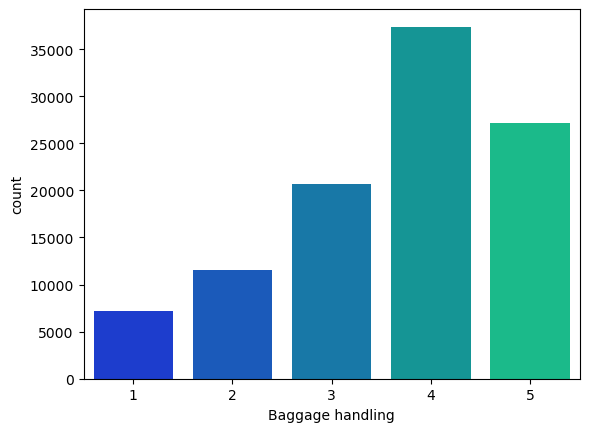

                 Checkin service  Ratio
Checkin service                        
4                          29055 27.963
3                          28446 27.377
5                          20619 19.844
2                          12893 12.409
1                          12890 12.406
0                              1  0.001
################


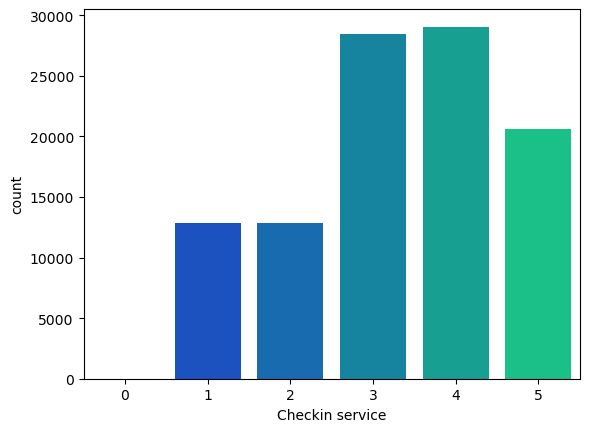

                  Inflight service  Ratio
Inflight service                         
4                            37945 36.519
5                            27116 26.097
3                            20299 19.536
2                            11457 11.027
1                             7084  6.818
0                                3  0.003
################


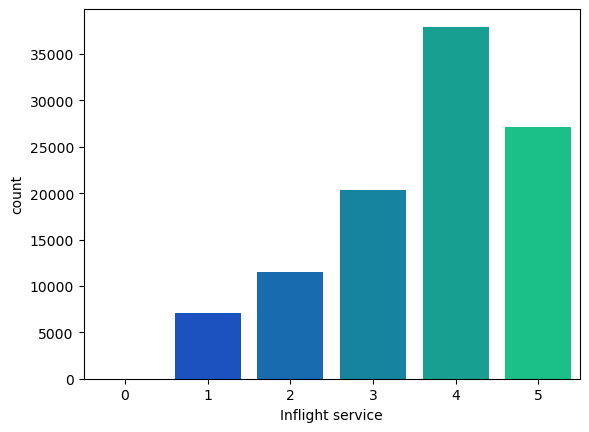

             Cleanliness  Ratio
Cleanliness                    
4                  27179 26.158
3                  24574 23.651
5                  22689 21.837
2                  16132 15.526
1                  13318 12.818
0                     12  0.012
################


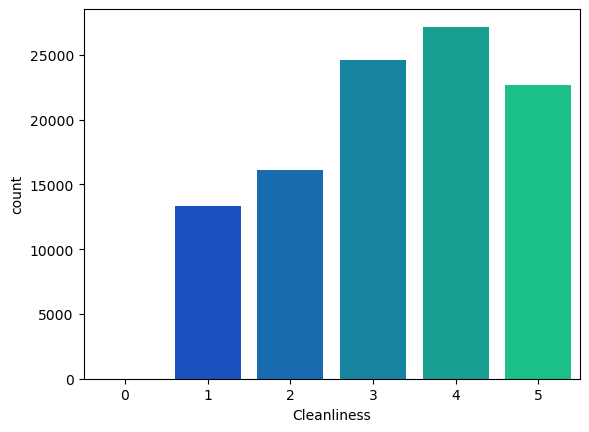

In [23]:
for col in cat_bar_chart:
    cat_summary(df1, col, True)

count   103904.000
mean        39.380
std         15.115
min          7.000
5%          14.000
10%         20.000
20%         25.000
30%         30.000
40%         36.000
50%         40.000
60%         44.000
70%         48.000
80%         53.000
90%         59.000
95%         64.000
99%         70.000
max         85.000
Name: Age, dtype: float64


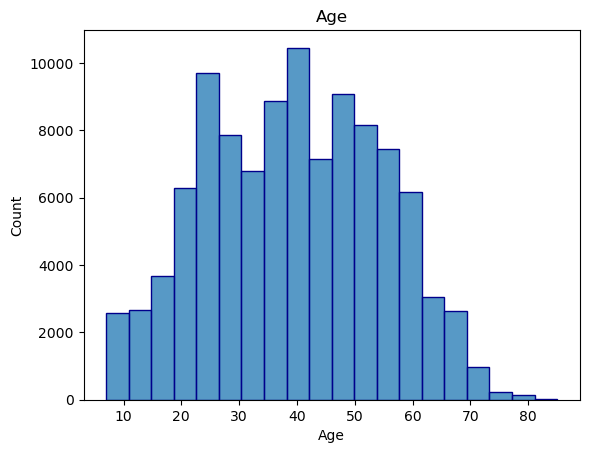

count   103904.000
mean      1189.448
std        997.147
min         31.000
5%         175.000
10%        236.000
20%        358.000
30%        482.000
40%        630.000
50%        843.000
60%       1050.000
70%       1513.000
80%       2065.000
90%       2750.000
95%       3383.000
99%       3882.000
max       4983.000
Name: Flight Distance, dtype: float64


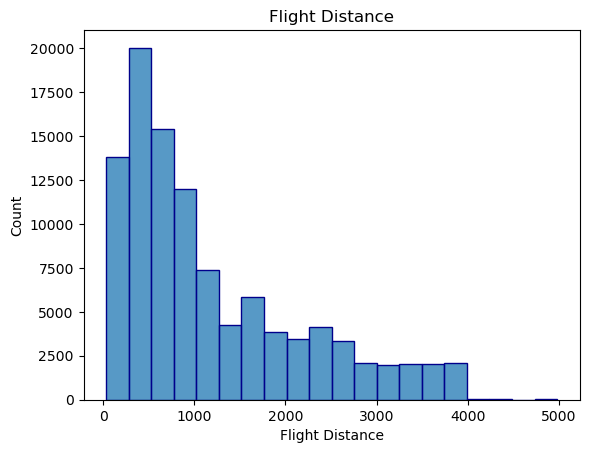

count   103904.000
mean        14.816
std         38.231
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          2.000
70%          8.000
80%         19.000
90%         44.000
95%         78.000
99%        181.970
max       1592.000
Name: Departure Delay in Minutes, dtype: float64


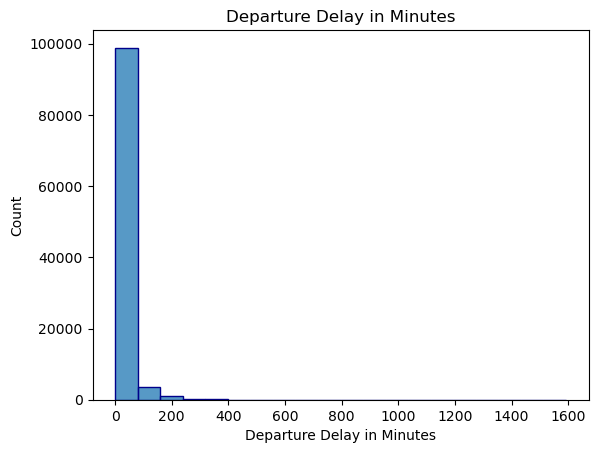

count   103594.000
mean        15.179
std         38.699
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          2.000
70%          9.000
80%         19.000
90%         44.000
95%         79.000
99%        184.000
max       1584.000
Name: Arrival Delay in Minutes, dtype: float64


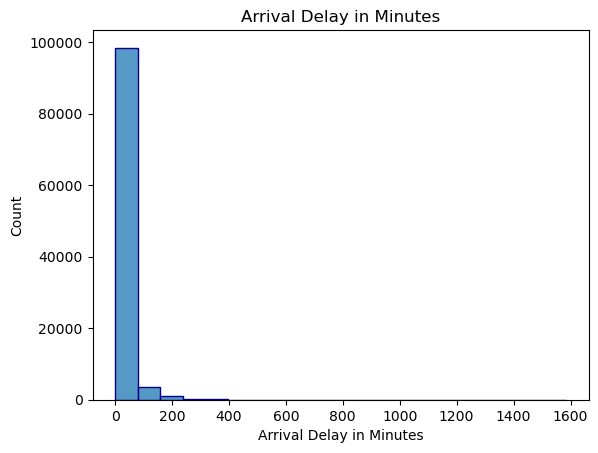

In [24]:
# Analize for numerical values
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        sns.histplot(dataframe[numerical_col], bins=20, palette="Paired", edgecolor='darkblue')
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df1, col, plot=True)

In [25]:
df1['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

In [26]:
# Target variable analysis with graphs

def target_summary_with_cat(dataframe, target, col_name):
    print(pd.DataFrame({"Taget Mean": dataframe.groupby(col_name)[target].mean()}))
    
for col in cat_cols:
    target_summary_with_cat(df1, "satisfaction", col)

        Taget Mean
Gender            
Female       0.427
Male         0.439
                   Taget Mean
Customer Type                
Loyal Customer          0.477
disloyal Customer       0.237
                 Taget Mean
Type of Travel             
Business travel       0.583
Personal Travel       0.102
          Taget Mean
Class               
Business       0.694
Eco            0.186
Eco Plus       0.246
              Taget Mean
satisfaction            
0                  0.000
1                  1.000
                       Taget Mean
Inflight wifi service            
0                           0.997
1                           0.325
2                           0.249
3                           0.251
4                           0.599
5                           0.991
                                   Taget Mean
Departure/Arrival time convenient            
0                                       0.475
1                                       0.487
2                              

In [27]:
# Target variable analysis with graphs
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = df1, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = df1, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2]);

In [28]:
# Target variable analysis according to numerical variables
def target_summary_with_num(dataframe, target, numeric_col):
    print(dataframe.groupby(target).agg({numeric_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df1, "satisfaction", col)

                Age
satisfaction       
0            37.567
1            41.751


              Flight Distance
satisfaction                 
0                     928.920
1                    1530.140


              Departure Delay in Minutes
satisfaction                            
0                                 16.504
1                                 12.608


              Arrival Delay in Minutes
satisfaction                          
0                               17.128
1                               12.631




In [29]:
# Group by Age Group and count the number of entries in each group
Age_Groups = df1.groupby('Age Group')[['satisfaction']].count()

# Create a pie chart for Age Group distribution
fig = px.pie(Age_Groups, 
             values='satisfaction', 
             names=Age_Groups.index, 
             width=800, 
             height=500, 
             color_discrete_sequence=px.colors.sequential.Blues[6:4:-1])

fig.update_layout(
    title='Distribution of Age Groups',
    legend_title="Age Group",
    font=dict(size=14)
)
fig.layout.template = 'plotly'
fig.show()

In [30]:
df1.drop("Age Group",axis=1, inplace=True)

In [31]:
df1.drop("Flight Distance Group",axis=1,inplace=True)

In [32]:
df1.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                          25                    18.000             0  
1                           1                     6.000             0  
2                           0                     0.000             1  
3                          11                     9.000             0  
4                           0                     0.000             1

In [33]:
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=df1, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

In [34]:
# Correlation Analysis
df1[num_cols].corr()
f, ax = plt.subplots(figsize=[10, 10])
sns.heatmap(df1[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="Blues")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [35]:
# The Missing Values Analysis
def missin_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / df1.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [36]:
missin_values_table(df1, True)

                          n_miss  ratio
Arrival Delay in Minutes     310  0.300


['Arrival Delay in Minutes']

In [37]:
# Filling in missing data with median
df1['Arrival Delay in Minutes'].fillna(df1['Arrival Delay in Minutes'].median(), inplace=True)

In [38]:
df1['Arrival Delay in Minutes'].isnull().sum()

0

In [39]:
df1.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                          25                    18.000             0  
1                           1                     6.000             0  
2                           0                     0.000             1  
3                          11                     9.000             0  
4                           0                     0.000             1

### 5. Feature Engineering

In [40]:
# Generating new variables from gender variable and customer type

df1.loc[(df1['Gender'] == "Male") & (df1['Customer Type'] == "Loyal Customer"), 'NEW_CUSTOMER_GENDER'] = "Male Loyal"
df1.loc[(df1['Gender'] == "Female") & (df1['Customer Type'] == "Loyal Customer"), 'NEW_CUSTOMER_GENDER'] = "Female Loyal"

df1.loc[(df1['Gender'] == "Male") & (df1['Customer Type'] == "disloyal Customer"), 'NEW_CUSTOMER_GENDER'] = "Male Unloyal"
df1.loc[(df1['Gender'] == "Female") & (df1['Customer Type'] == "disloyal Customer"), 'NEW_CUSTOMER_GENDER'] = "Female Unloyal"

In [41]:
df1.groupby("NEW_CUSTOMER_GENDER").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                            mean  count
NEW_CUSTOMER_GENDER                    
Female Loyal               0.476  42458
Female Unloyal             0.226  10269
Male Loyal                 0.479  42465
Male Unloyal               0.249   8712

In [42]:
# Creating a new variable by grouping the age variable within itself

df1.loc[(df1['Age'] >= 7) & (df1['Age'] < 25), 'NEW_AGE_CAT'] = "young"
df1.loc[(df1['Age'] >= 25) & (df1['Age'] < 40), 'NEW_AGE_CAT'] = "mature"
df1.loc[(df1['Age'] >= 40) & (df1['Age'] < 65), 'NEW_AGE_CAT'] = "middle_age"
df1.loc[(df1['Age'] >= 65) & (df1['Age'] < 95), 'NEW_AGE_CAT'] = "old_age"

In [43]:
df1.groupby("NEW_AGE_CAT").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                    mean  count
NEW_AGE_CAT                    
mature             0.389  31571
middle_age         0.554  47770
old_age            0.184   4748
young              0.274  19815

In [44]:
# Creating a new variable based on gender with the created age groups

df1.loc[(df1['NEW_AGE_CAT'] == "young") & (df1['Gender'] == "Male"), 'NEW_AGE_Gender'] = "young Male"
df1.loc[(df1['NEW_AGE_CAT'] == "young") & (df1['Gender'] == "Female"), 'NEW_AGE_Gender'] = "young Female"

df1.loc[(df1['NEW_AGE_CAT'] == "mature") & (df1['Gender'] == "Male"), 'NEW_AGE_Gender'] = "mature Male"
df1.loc[(df1['NEW_AGE_CAT'] == "mature") & (df1['Gender'] == "Female"), 'NEW_AGE_Gender'] = "mature Female"

df1.loc[(df1['NEW_AGE_CAT'] == "middle_age") & (df1['Gender'] == "Male"), 'NEW_AGE_Gender'] = "middle_age Male"
df1.loc[(df1['NEW_AGE_CAT'] == "middle_age") & (df1['Gender'] == "Female"), 'NEW_AGE_Gender'] = "middle_age Female"

df1.loc[(df1['NEW_AGE_CAT'] == "old_age") & (df1['Gender'] == "Male"), 'NEW_AGE_Gender'] = "old_age Male"
df1.loc[(df1['NEW_AGE_CAT'] == "old_age") & (df1['Gender'] == "Female"), 'NEW_AGE_Gender'] = "old_age Female"

In [45]:
df1.groupby("NEW_AGE_Gender").agg({"satisfaction": ["mean", "count"]})


satisfaction       
                          mean  count
NEW_AGE_Gender                       
mature Female            0.378  15982
mature Male              0.400  15589
middle_age Female        0.552  24048
middle_age Male          0.556  23722
old_age Female           0.181   2419
old_age Male             0.188   2329
young Female             0.271  10278
young Male               0.276   9537

In [46]:
# Creating a new variable over Type of Travel and Customer Type variables

df1.loc[(df1['Type of Travel'] == "Personal Travel") & (df1['Customer Type'] == "Loyal Customer"), 'NEW_CUSTOMER_TRAVEL_TYPE'] = "Personal Loyal"
df1.loc[(df1['Type of Travel'] == "Business travel") & (df1['Customer Type'] == "Loyal Customer"), 'NEW_CUSTOMER_TRAVEL_TYPE'] = "Business Loyal"

df1.loc[(df1['Type of Travel'] == "Personal Travel") & (df1['Customer Type'] == "disloyal Customer"), 'NEW_CUSTOMER_TRAVEL_TYPE'] = "Personal Unloyal"
df1.loc[(df1['Type of Travel'] == "Business travel") & (df1['Customer Type'] == "disloyal Customer"), 'NEW_CUSTOMER_TRAVEL_TYPE'] = "Business Unloyal"

In [47]:
df1.groupby("NEW_CUSTOMER_TRAVEL_TYPE").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                                 mean  count
NEW_CUSTOMER_TRAVEL_TYPE                    
Business Loyal                  0.706  52838
Business Unloyal                0.237  18817
Personal Loyal                  0.101  32085
Personal Unloyal                0.159    164

In [48]:
# Generating a new variable with NEW_CUSTOMER_TRAVEL_TYPE based on gender breakdown


df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Loyal") & (df1['Gender'] == "Male"), 'NEW_CUSTOMER-TRAVEL_GENDER'] = "Personal Loyal Male"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Loyal") & (df1['Gender'] == "Female"), 'NEW_CUSTOMER-TRAVEL_GENDER'] = "Personal Loyal Female"

df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Loyal") & (df1['Gender'] == "Male"), 'NEW_CUSTOMER-TRAVEL_GENDER'] = "Business Loyal Male"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Loyal") & (df1['Gender'] == "Female"), 'NEW_CUSTOMER-TRAVEL_GENDER'] = "Business Loyal Female"

df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Unloyal") & (df1['Gender'] == "Male"), 'NEW_CUSTOMER-TRAVEL_GENDER'] = "Personal Unloyal Male"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Unloyal") & (df1['Gender'] == "Female"), 'NEW_CUSTOMER-TRAVEL_GENDER'] = "Personal Unloyal Female"

df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Unloyal") & (df1['Gender'] == "Male"), 'NEW_CUSTOMER-TRAVEL_GENDER'] = "Business Unloyal Male"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Unloyal") & (df1['Gender'] == "Female"), 'NEW_CUSTOMER-TRAVEL_GENDER'] = "Business Unloyal Female"

In [49]:
df1.groupby("NEW_CUSTOMER-TRAVEL_GENDER").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                                   mean  count
NEW_CUSTOMER-TRAVEL_GENDER                    
Business Loyal Female             0.705  26344
Business Loyal Male               0.706  26494
Business Unloyal Female           0.227  10184
Business Unloyal Male             0.250   8633
Personal Loyal Female             0.102  16114
Personal Loyal Male               0.101  15971
Personal Unloyal Female           0.153     85
Personal Unloyal Male             0.165     79

In [50]:
# Create a new variable with NEW_CUSTOMER_TRAVEL_TYPE in the class breakdown

df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Loyal") & (df1['Class'] == "Eco"), 'NEW_TRAVEL_TYPE_CLASS'] = "Personal Loyal Eco"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Loyal") & (df1['Class'] == "Eco Plus"), 'NEW_TRAVEL_TYPE_CLASS'] = "Personal Loyal Eco Plus"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Loyal") & (df1['Class'] == "Business"), 'NEW_TRAVEL_TYPE_CLASS'] = "Personal Loyal Business"

df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Loyal") & (df1['Class'] == "Eco"), 'NEW_TRAVEL_TYPE_CLASS'] = "Business Loyal Eco"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Loyal") & (df1['Class'] == "Eco Plus"), 'NEW_TRAVEL_TYPE_CLASS'] = "Business Loyal Eco Plus"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Loyal") & (df1['Class'] == "Business"), 'NEW_TRAVEL_TYPE_CLASS'] = "Business Loyal Business"

df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Unloyal") & (df1['Class'] == "Eco"), 'NEW_TRAVEL_TYPE_CLASS'] = "Personal Unloyal Eco"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Unloyal") & (df1['Class'] == "Eco Plus"), 'NEW_TRAVEL_TYPE_CLASS'] = "Personal Unloyal Eco Plus"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Personal Unloyal") & (df1['Class'] == "Business"), 'NEW_TRAVEL_TYPE_CLASS'] = "Personal Unloyal Business"

df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Unloyal") & (df1['Class'] == "Eco"), 'NEW_TRAVEL_TYPE_CLASS'] = "Business Unloyal Eco"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Unloyal") & (df1['Class'] == "Eco Plus"), 'NEW_TRAVEL_TYPE_CLASS'] = "Business Unloyal Eco Plus"
df1.loc[(df1['NEW_CUSTOMER_TRAVEL_TYPE'] == "Business Unloyal") & (df1['Class'] == "Business"), 'NEW_TRAVEL_TYPE_CLASS'] = "Business Unloyal Business"

In [51]:
df1.groupby("NEW_TRAVEL_TYPE_CLASS").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                                  mean  count
NEW_TRAVEL_TYPE_CLASS                        
Business Loyal Business          0.779  40163
Business Loyal Eco               0.474   9496
Business Loyal Eco Plus          0.464   3179
Business Unloyal Business        0.396   7345
Business Unloyal Eco             0.139  10761
Business Unloyal Eco Plus        0.079    711
Personal Loyal Business          0.123   2146
Personal Loyal Eco               0.102  26339
Personal Loyal Eco Plus          0.087   3600
Personal Unloyal Business        0.000     11
Personal Unloyal Eco             0.174    149
Personal Unloyal Eco Plus        0.000      4

In [52]:
df1["NEW_DELAY_GAP"] = abs(df1["Departure Delay in Minutes"] - df1["Arrival Delay in Minutes"])

In [53]:
df1.groupby("NEW_DELAY_GAP").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                      mean  count
NEW_DELAY_GAP                    
0.000                0.467  48964
1.000                0.442   5832
2.000                0.432   5154
3.000                0.427   4591
4.000                0.422   4250
...                    ...    ...
234.000              1.000      1
266.000              0.000      1
271.000              0.000      1
414.000              0.000      1
455.000              0.000      1

[160 rows x 2 columns]

In [54]:
# Creating a new variable by classifying over the Flight Distance variable

df1.loc[(df1['Flight Distance'] <= 1500), 'NEW_DISTANCE_SEGMENTATION'] = "short distance"
df1.loc[(df1['Flight Distance'] > 1500), 'NEW_DISTANCE_SEGMENTATION'] = "long distance"

In [55]:
df1.groupby("NEW_DISTANCE_SEGMENTATION").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                                  mean  count
NEW_DISTANCE_SEGMENTATION                    
long distance                    0.659  31471
short distance                   0.335  72433

In [56]:
# Creating a new variable for the overall evaluation of in-flight satisfaction
df1["NEW_FLIGHT_SITUATION"] = (df1["Inflight wifi service"] + df1["Food and drink"] + df1["Seat comfort"] + df1["Inflight entertainment"] + df1["Leg room service"]) / 25

df1.groupby("NEW_FLIGHT_SITUATION").agg({"satisfaction": ["mean", "count"]})

satisfaction      
                             mean count
NEW_FLIGHT_SITUATION                   
0.120                       0.000     1
0.160                       0.941    34
0.200                       0.129   443
0.240                       0.067   852
0.280                       0.088  1487
0.320                       0.106  2318
0.360                       0.109  3569
0.400                       0.131  4266
0.440                       0.149  4987
0.480                       0.177  5476
0.520                       0.188  6490
0.560                       0.216  6691
0.600                       0.304  7270
0.640                       0.376  7755
0.680                       0.469  8824
0.720                       0.582  8926
0.760                       0.633  8870
0.800                       0.678  8265
0.840                       0.729  7203
0.880                       0.772  4935
0.920                       0.798  2929
0.960                       0.885  1654
1.000                       0.994   659

In [57]:
# Creating a new variable for general evaluation of operational transactions
df1["NEW_OPERATIONAL"] = (df1["Departure/Arrival time convenient"] + df1["Cleanliness"] + df1["Baggage handling"] + df1["Gate location"]) / 20

df1.groupby("NEW_OPERATIONAL").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                        mean  count
NEW_OPERATIONAL                    
0.150                  0.500      8
0.200                  0.182    121
0.250                  0.167    443
0.300                  0.177   1156
0.350                  0.246   2427
0.400                  0.295   3915
0.450                  0.372   6199
0.500                  0.394   8555
0.550                  0.413  10876
0.600                  0.387  11998
0.650                  0.382  12548
0.700                  0.398  12303
0.750                  0.424  10858
0.800                  0.507   8923
0.850                  0.590   6227
0.900                  0.713   4142
0.950                  0.824   2326
1.000                  0.909    879

In [58]:
# Creating a new variable for the general evaluation of online transactions
df1["NEW_ONLINE"] = (df1["Ease of Online booking"] + df1["Online boarding"] + df1["Checkin service"]) / 15

df1.groupby("NEW_ONLINE").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                   mean  count
NEW_ONLINE                    
0.067             0.479    286
0.133             0.494    324
0.200             0.239   1863
0.267             0.253   2338
0.333             0.140   5486
0.400             0.131   6385
0.467             0.152  10542
0.533             0.256  11100
0.600             0.335  14505
0.667             0.472  13631
0.733             0.552  13739
0.800             0.710  10152
0.867             0.794   7970
0.933             0.933   3863
1.000             0.941   1720

In [59]:
#  Evaluation of personnel and creation of new variables
df1["NEW_PERSONAL_BEHAVIOR"] = (df1["On-board service"] + df1["Inflight service"]) / 10

df1.groupby("NEW_PERSONAL_BEHAVIOR").agg({"satisfaction": ["mean", "count"]})

satisfaction       
                              mean  count
NEW_PERSONAL_BEHAVIOR                    
0.000                        0.000      3
0.200                        0.185   3880
0.300                        0.332   2093
0.400                        0.256  10887
0.500                        0.201   8357
0.600                        0.297  15012
0.700                        0.266  11471
0.800                        0.599  26451
0.900                        0.377   9153
1.000                        0.744  16597

In [60]:
cat_cols, num_cols, cat_but_car = grab_col_names(df1)

Observations: 103904
Variables: 35
cat_cols: 26
num_cols: 9
cat_but_car: 0
num_but_cat: 15


In [61]:
df1.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                          25                    18.000             0   
1                           1                     6.000             0   
2                           0                     0.000             1   
3                          11                     9.000             0   
4                           0                     0.000             1   

  NEW_CUSTOMER_GENDER NEW_AGE_CAT   NEW_AGE_Gender NEW_CUSTOMER_TRAVEL_TYPE  \
0          Male Loyal       young       young Male           Personal Loyal   
1        Male Unloyal      mature      mature Male         Business Unloyal   
2        Female Loyal      mature    mature Female           Business Loyal   
3        Female Loyal      mature    mature Female           Business Loyal   
4          Male Loyal  middle_age  middle_age Male           Business Loyal   

  NEW_CUSTOMER-TRAVEL_GENDER      NEW_TRAVEL_TYPE_CLASS  NEW_DELAY_GAP  \
0        Personal Loyal Male    Personal Loyal Eco Plus          7.000   
1      Business Unloyal Male  Business Unloyal Business          5.000   
2      Business Loyal Female    Business Loyal Business          0.000   
3      Business Loyal Female    Business Loyal Business          2.000   
4        Business Loyal Male    Business Loyal Business          0.000   

  NEW_DISTANCE_SEGMENTATION  NEW_FLIGHT_SITUATION  NEW_OPERATIONAL  \
0            short distance                 0.840            0.700   
1            short distance                 0.440            0.450   
2            short distance                 0.800            0.650   
3            short distance                 0.520            0.750   
4            short distance                 0.760            0.

In [62]:
missin_values_table(df1, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [63]:
# Encoding Operations

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [64]:
binary_cols = [col for col in df1.columns if df1[col].dtypes == "O" and df1[col].nunique() == 2]
binary_cols

['Gender', 'Customer Type', 'Type of Travel', 'NEW_DISTANCE_SEGMENTATION']

In [65]:
for col in binary_cols:
    df1 = label_encoder(df1, col)

In [66]:
non_binary_cols = [col for col in df1[cat_cols] if col not in binary_cols]

In [67]:
for col in non_binary_cols:
    df1 = label_encoder(df1, col)

In [68]:
# Standardize for numeric variables

ss = StandardScaler()
df1[num_cols] = ss.fit_transform(df1[num_cols])

### 6. Modelling

In [69]:
y = df1["satisfaction"]
X = df1.drop(["satisfaction"], axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [71]:
# Base model results for Train set

models = [('KNN',  KNeighborsClassifier()),
          ('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('CART', DecisionTreeClassifier()),
          ('Random Forest',   RandomForestClassifier()),
          ("LightGBM", LGBMClassifier(verbose=-1)),
          ('CatBoost', CatBoostClassifier(verbose=False))]

In [72]:
# For each model, a dictionary is created to store the performance
performances = {}

for name, classifier in models:
    # Train the model
    classifier.fit(X_train.values, y_train)
    
    #  Obtaining predicted values
    y_pred = classifier.predict(X_test.values)
    
    # Calculation of metric values
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Adding performance values to the dictionary
    performances[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC AUC': roc_auc}

# Display of the obtained performance values
for name, performance in performances.items():
    print(f"{name}:")
    for metric_name, value in performance.items():
        print(f"  {metric_name}: {round(value, 3)}")
    print()

KNN:
  Accuracy: 0.926
  Precision: 0.947
  Recall: 0.881
  F1: 0.913
  ROC AUC: 0.921

Logistic Regression:
  Accuracy: 0.877
  Precision: 0.879
  Recall: 0.835
  F1: 0.857
  ROC AUC: 0.872

CART:
  Accuracy: 0.943
  Precision: 0.932
  Recall: 0.938
  F1: 0.935
  ROC AUC: 0.942

Random Forest:
  Accuracy: 0.961
  Precision: 0.972
  Recall: 0.939
  F1: 0.955
  ROC AUC: 0.959

LightGBM:
  Accuracy: 0.965
  Precision: 0.978
  Recall: 0.942
  F1: 0.959
  ROC AUC: 0.962

CatBoost:
  Accuracy: 0.964
  Precision: 0.974
  Recall: 0.944
  F1: 0.959
  ROC AUC: 0.962



In [73]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

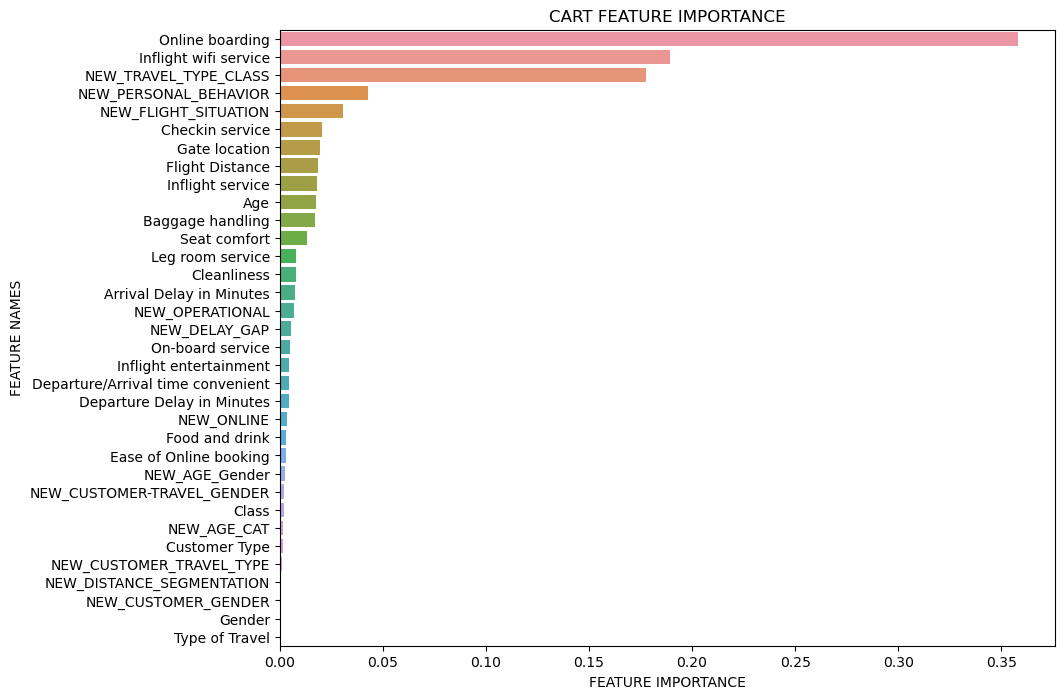

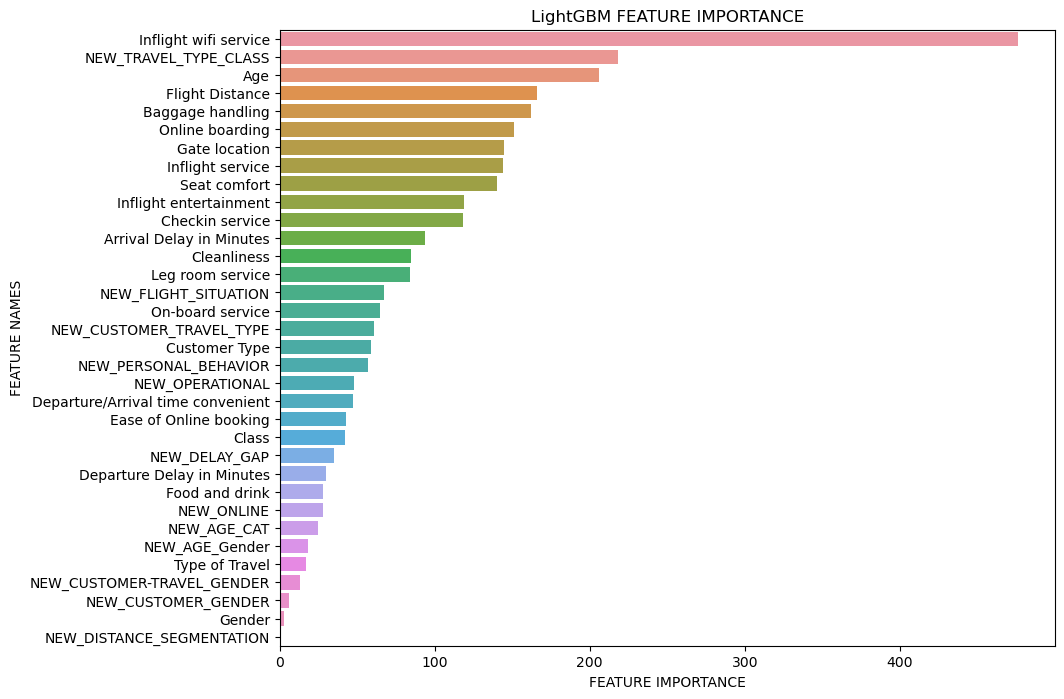

In [74]:
selected_models = [
    ('CART', DecisionTreeClassifier()),
    ('RF',   RandomForestClassifier()),
    ("LightGBM", LGBMClassifier(verbose=-1)),
    ('CatBoost', CatBoostClassifier(verbose=False))
 ]

for name, model in selected_models:
    model.fit(X_train, y_train)
    if name == "CatBoost":  # CatBoost için özel bir yöntem
        importance = model.feature_importances_
    else:
        importance = model.feature_importances_
    
    # Selecting feature names
    names = X_train.columns.tolist()
    plot_feature_importance(importance, names, model_type=name)

 ##### Hyperparameter Optimization

In [75]:
# LGBM
##################
lgbm_model = LGBMClassifier(verbose=-1).fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

lgbm_model.get_params()

lgbm_params = {'n_estimators': [50, 100, 150],
               'max_depth': [None, 10, 20],
               'learning_rate': [0.01, 0.1]}

lgbm_grid = GridSearchCV(lgbm_model, lgbm_params,cv=5, verbose=False,n_jobs=-1).fit(X_train,y_train)

lgbm_grid.best_params_

{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 150}

In [76]:
lgbm_final = lgbm_model.set_params(**lgbm_grid.best_params_, random_state=17).fit(X_train,y_train)

lgbm_final_results = {'Accuracy': accuracy_score(y_test, y_pred),
                      'Precision': precision_score(y_test, y_pred),
                      'Recall': recall_score(y_test, y_pred),
                      'F1 Score': f1_score(y_test, y_pred),
                      'ROC-AUC': roc_auc_score(y_test, y_pred)}

lgbm_final_results

{'Accuracy': 0.964967999615033,
 'Precision': 0.9778585216305212,
 'Recall': 0.9417167851284856,
 'F1 Score': 0.9594474153297684,
 'ROC-AUC': 0.9624792244652398}

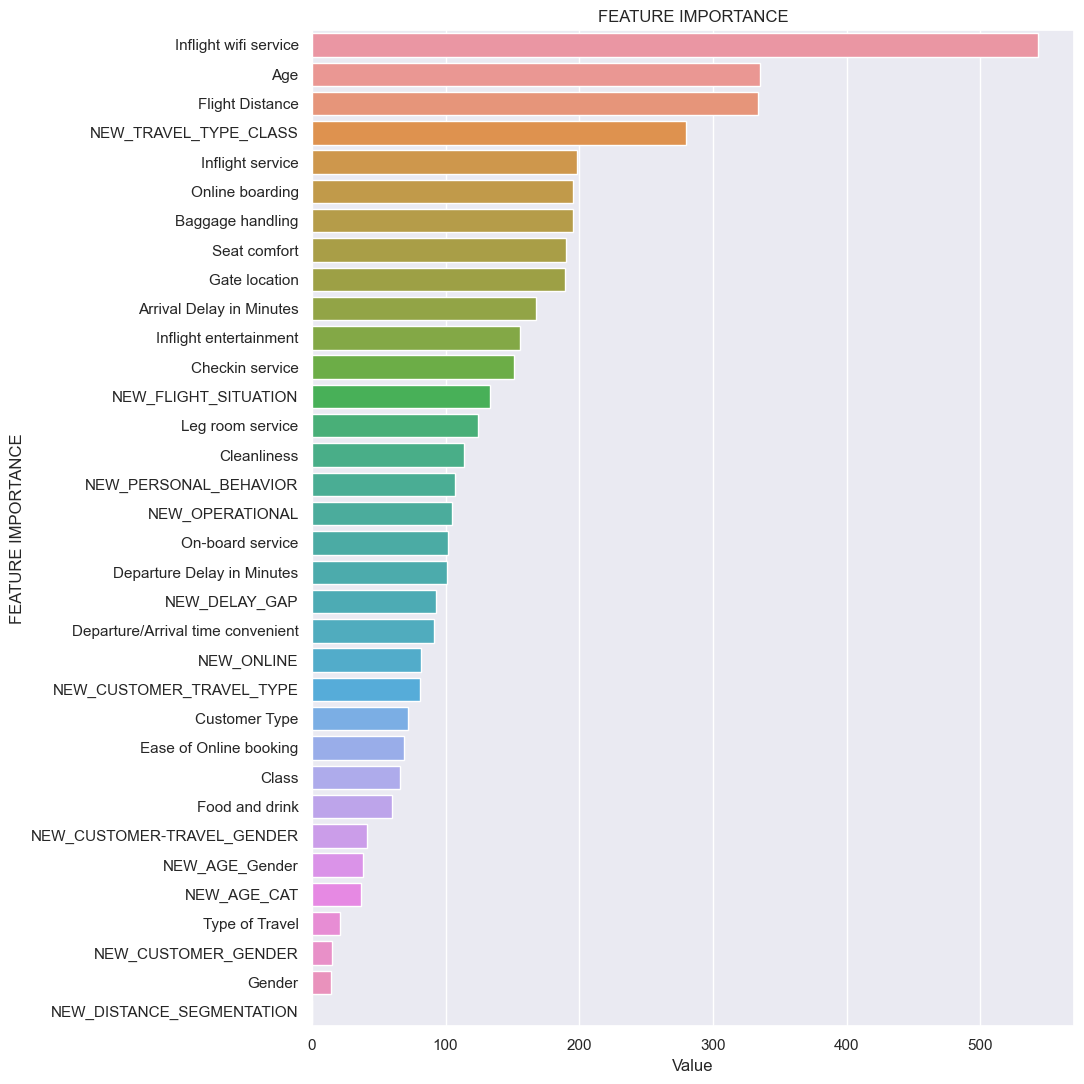

In [77]:
# Feature Importance - LightGBM
###############################

def plot_importance(model, features, num=50, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "FEATURE IMPORTANCE": features.columns})
    plt.figure(figsize=(11,11))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="FEATURE IMPORTANCE", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title( "FEATURE IMPORTANCE")
    plt.tight_layout()
    plt.show(block = True)
    if save:
        plt.savefig("importances.png")



plot_importance(lgbm_final, X_test)

In [78]:
# Random Forest
#########################

rf_model = RandomForestClassifier(random_state=46).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)


rf_model.get_params()

rf_params = {'n_estimators': [50, 100, 150],
             'max_depth': [None, 10, 20],
             'min_samples_split': [2, 4, 6, 8],
             'max_features': [3,5,7]}

rf_grid = GridSearchCV(rf_model, rf_params,cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

rf_grid.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 4,
 'n_estimators': 150}

In [79]:
rf_final = rf_model.set_params(**rf_grid.best_params_, random_state=17).fit(X_train,y_train)

rf_final_results = {'Accuracy': accuracy_score(y_test, y_pred),
                      'Precision': precision_score(y_test, y_pred),
                      'Recall': recall_score(y_test, y_pred),
                      'F1 Score': f1_score(y_test, y_pred),
                      'ROC-AUC': roc_auc_score(y_test, y_pred)}

rf_final_results

{'Accuracy': 0.9616957797988547,
 'Precision': 0.9727097723927075,
 'Recall': 0.9393110989611809,
 'F1 Score': 0.9557187360925679,
 'ROC-AUC': 0.9592997571120789}

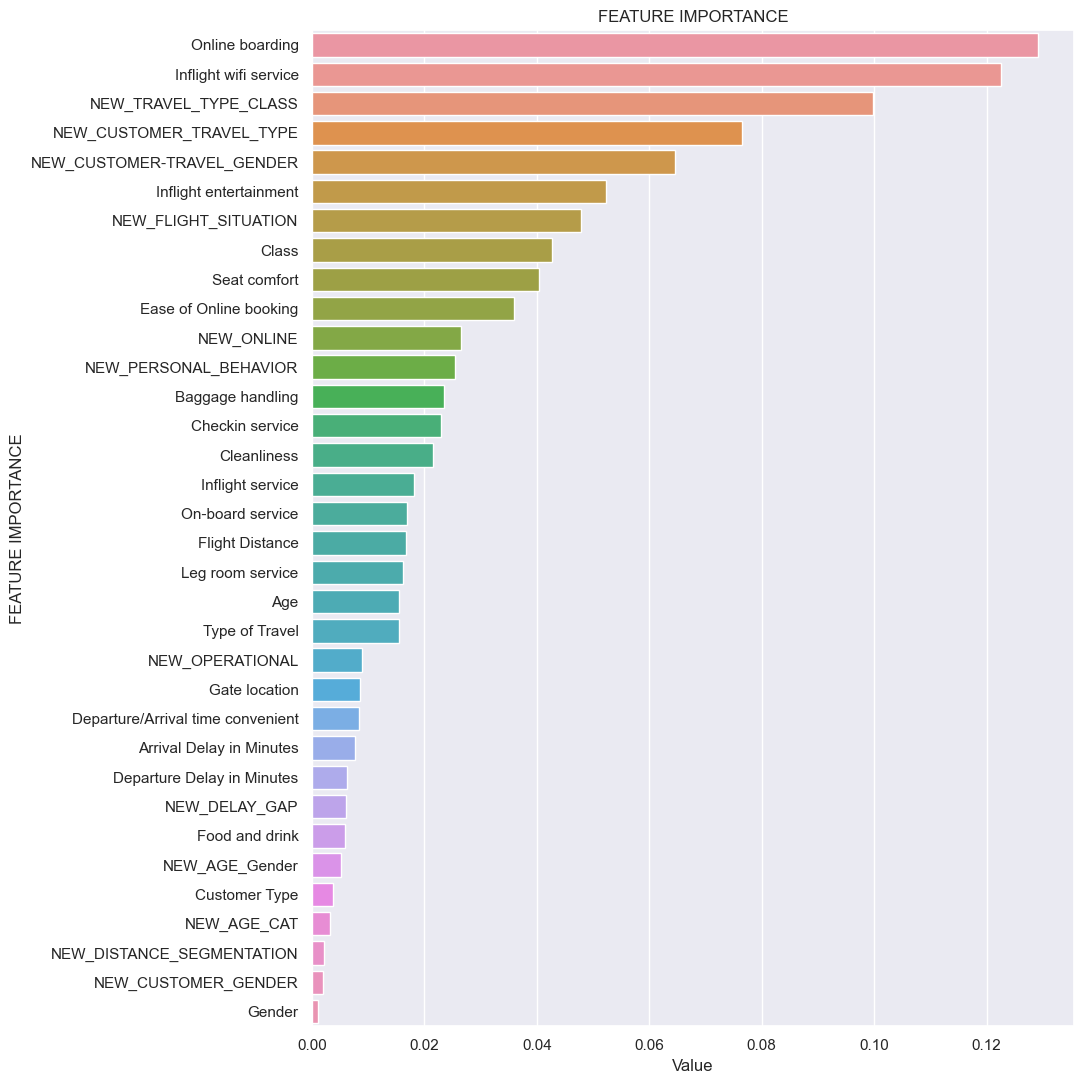

In [80]:
plot_importance(rf_final, X_test)